In [16]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os,sys
from PIL import Image
sys.path.append("..")

from utils import *
from errors import *

from skimage.color import rgb2gray
from skimage import feature
from scipy import ndimage as ndi
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches


In [18]:
# Loaded a set of images
root_dir = "../../data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(20, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images from images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images from groundtruth")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]

n_train = 11 # Only use 11 images for training
n_test = n - n_train
imgs_tr = [imgs[i] for i in range(n_train)]
imgs_te = [imgs[i] for i in range(n_train, n)]

print("Color images:")
print(np.shape(imgs_tr))
print(np.shape(imgs_te))


Loading 20 images from images
Loading 20 images from groundtruth
Color images:
(11, 400, 400, 3)
(9, 400, 400, 3)


### -------- R, G, B --------

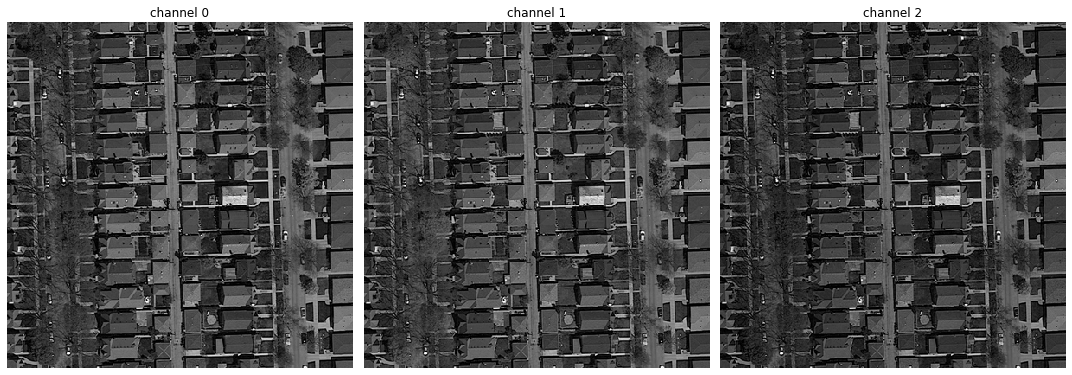

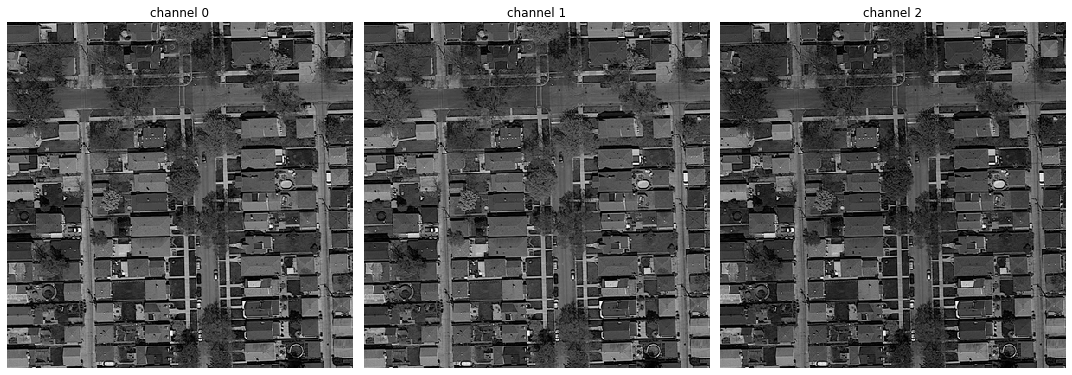

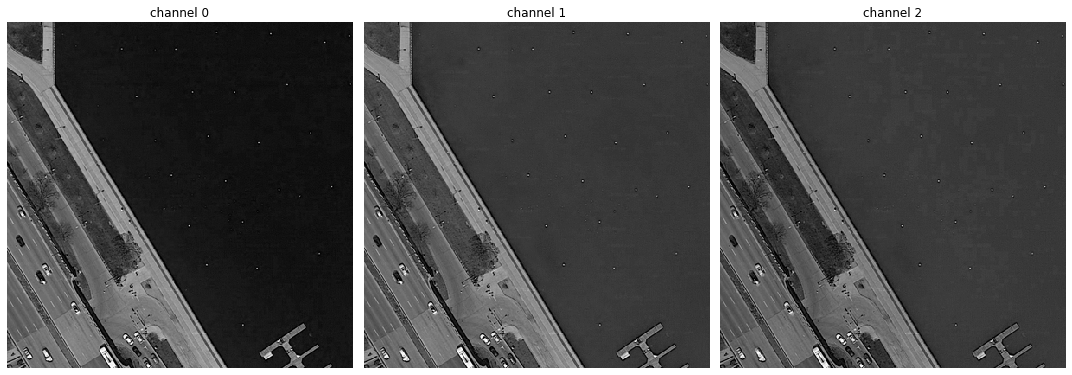

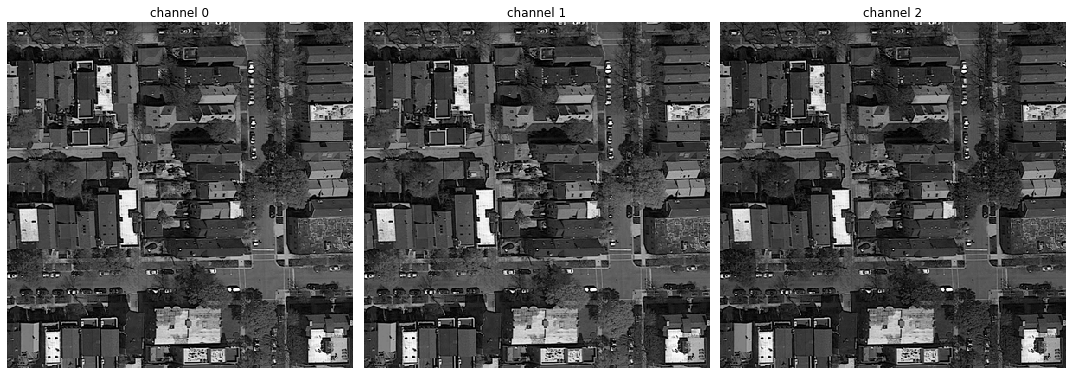

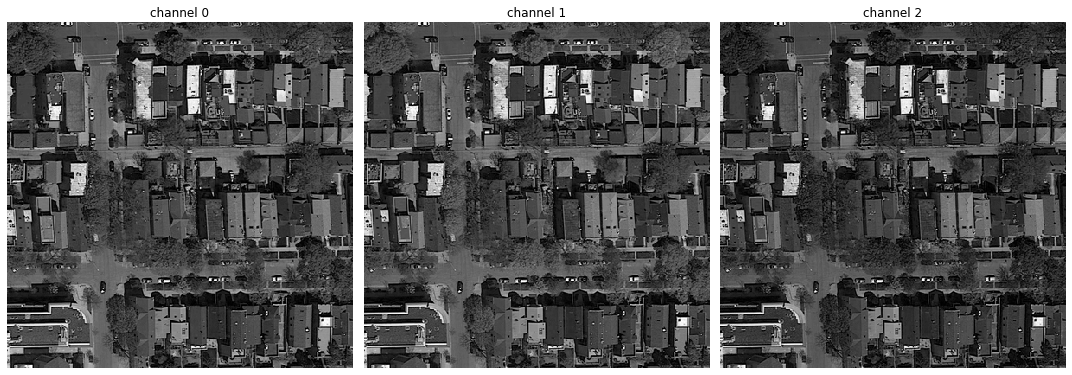

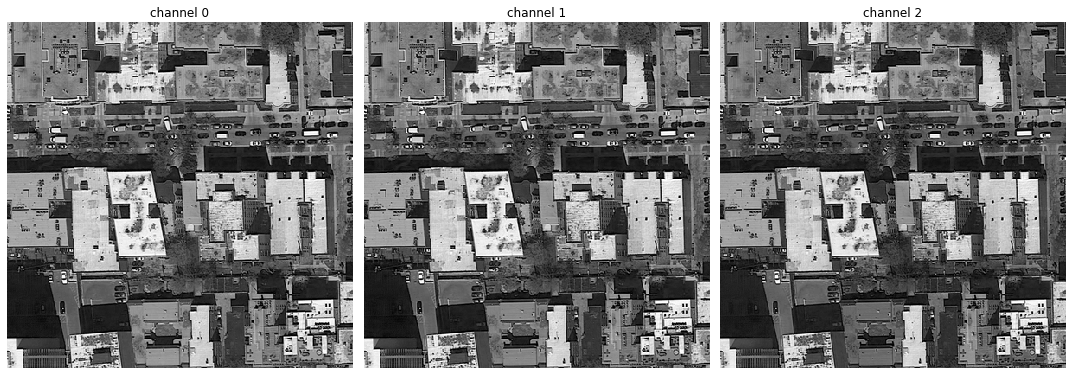

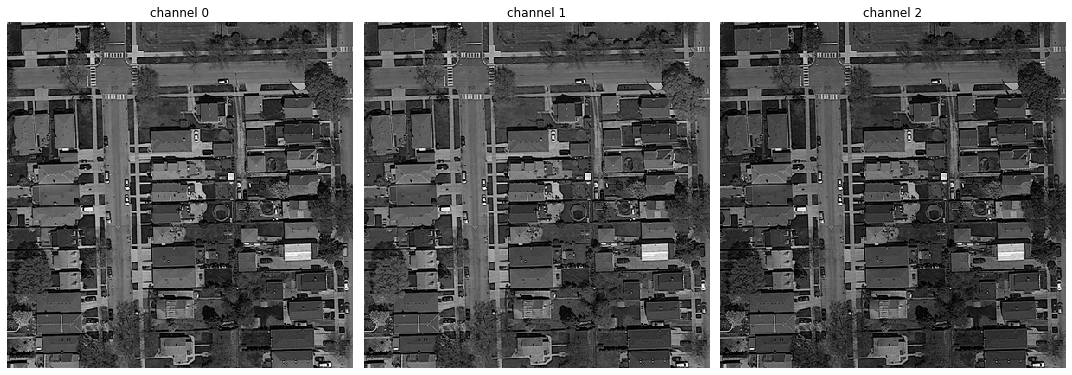

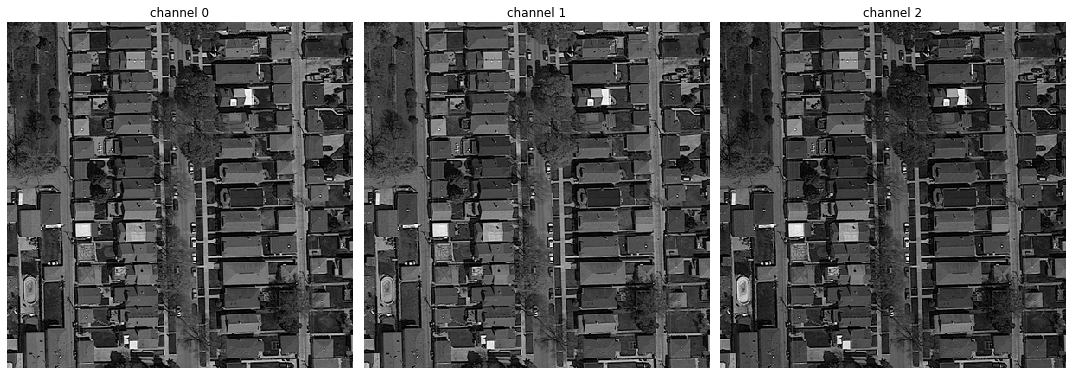

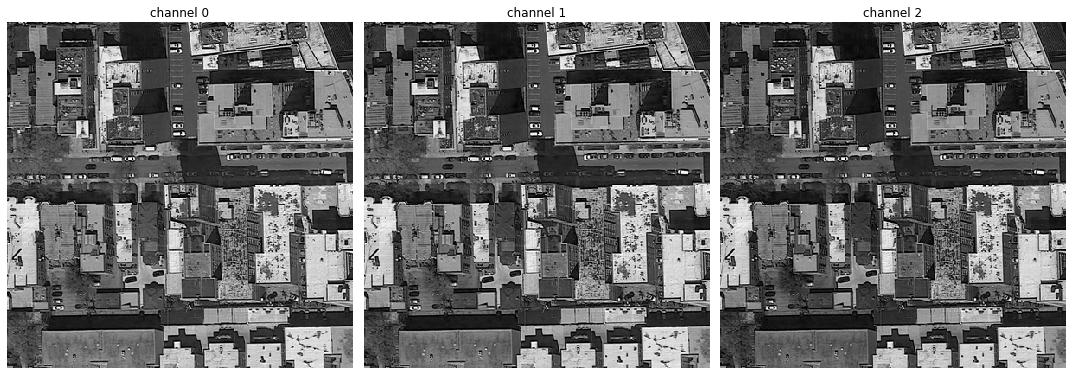

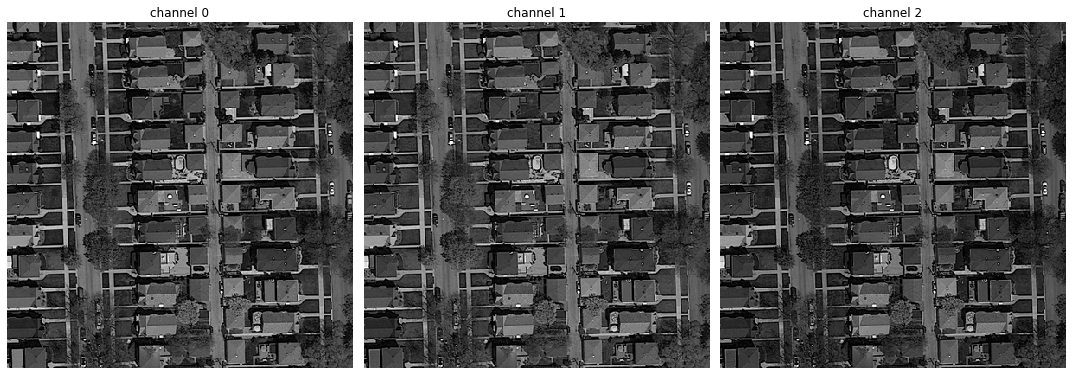

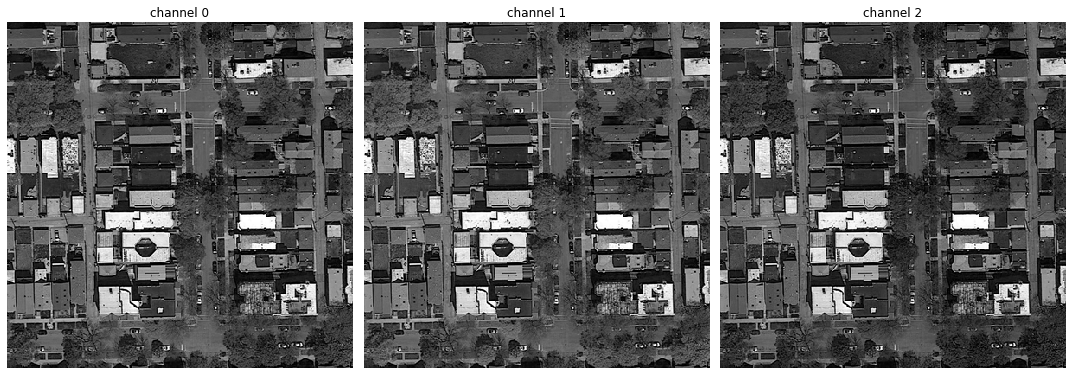

In [56]:

for i in range(np.shape(imgs_tr)[0]):
    fig, ax = plt.subplots(nrows=1, ncols=np.shape(imgs_tr)[3], figsize=(15, 6), sharex=True, sharey=True)
    for j in range(np.shape(imgs_tr)[3]):
        ax[j].imshow(imgs_tr[i][:, :, j], cmap=cm.gray)
        ax[j].axis('off')
        ax[j].set_title('channel ' + str(j))
    plt.tight_layout()
    plt.show()

### No results at all :/
